# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1.Визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

In [2]:
data = pd.read_excel('geo.xlsx', index_col=0)

data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.3 MB


посмотрим на правильное деление чтобы иметь представление о верной картинке

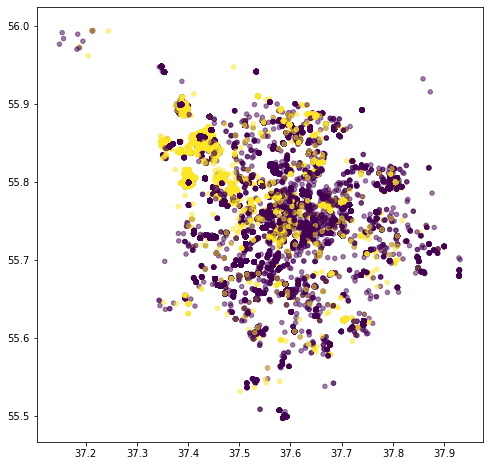

In [4]:
plt.figure(figsize=(8, 8))
plt.scatter(data.x, data.y, c = data.comment_class, s = 20, alpha = 0.5)

In [5]:
from sklearn.cluster import KMeans

In [6]:
data.iloc[:,:-1].head()

,x,y
0,37.612416,55.777454
1,37.612416,55.777454
2,37.603298,55.742108
3,37.558526,55.728758
4,37.566431,55.731794


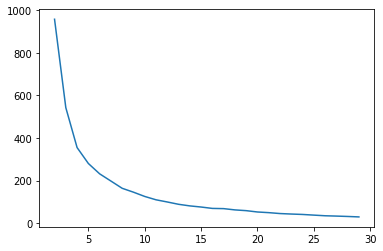

In [7]:
inertias = []
for k in range(2,30):
    mns = KMeans(n_clusters = k, n_jobs=-1)
    mns.fit(data.iloc[:,:-1])
    inertias.append(mns.inertia_)
plt.plot(list(range(2,30)),inertias)

In [15]:
kmns = KMeans(n_clusters = 4, n_jobs=-1)
output = kmns.fit_predict(data.iloc[:,:-1])

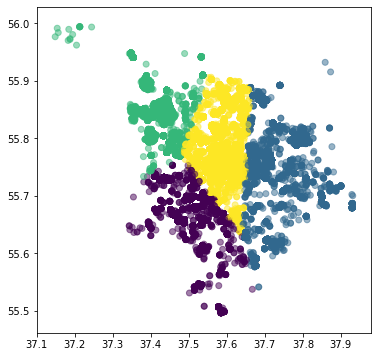

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(data.x, data.y, c = output, alpha = 0.5)

## 2.Аналогично исследовать скопления голосов за и против отдельно

Смотрим сперва за

In [17]:
data_for = data.loc[data["comment_class"] == 1]
data_for = data.iloc[:,:-1]
data_for.head()

,x,y
0,37.612416,55.777454
1,37.612416,55.777454
2,37.603298,55.742108
3,37.558526,55.728758
4,37.566431,55.731794


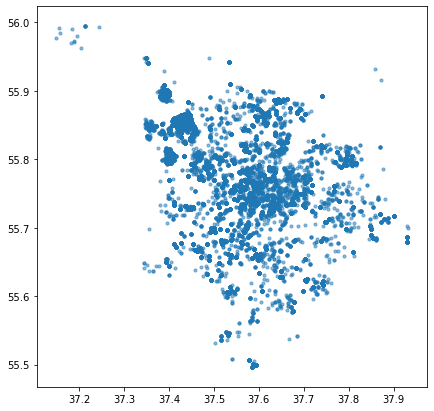

In [18]:
plt.figure(figsize=(7, 7))
plt.scatter(data_for.x, data_for.y, s = 10, alpha = 0.5)

Используем алгоритм Kmeans:

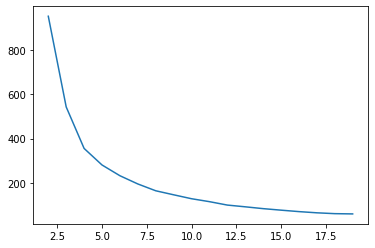

In [19]:
inertias = []
for k in range(2,20):
    kmns = KMeans(n_clusters = k)
    kmns.fit(data_for)
    inertias.append(kmns.inertia_)
plt.plot(list(range(2,20)),inertias)

Так на глаз переломный момент гдето в райное 4

In [20]:
kmns = KMeans(n_clusters = 4, n_jobs=-1)
output = kmns.fit_predict(data_for.iloc[:,:-1])

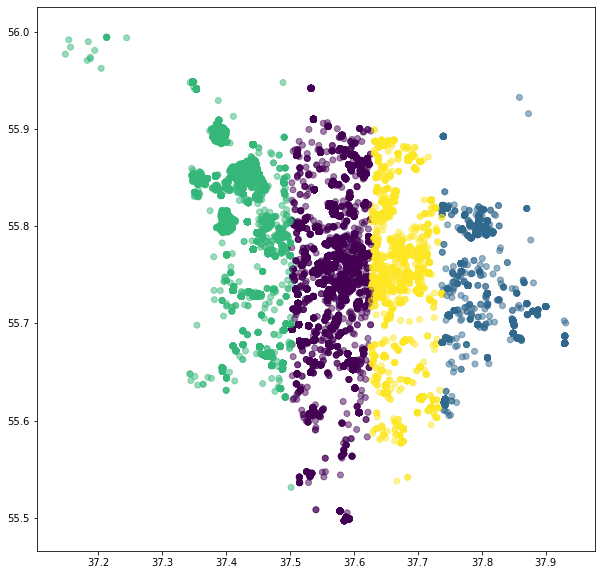

In [21]:
plt.figure(figsize=(10, 10))
plt.scatter(data_for.x, data_for.y, c = output, alpha = 0.5)

In [8]:
data_against = data.loc[data["comment_class"] == -1]
data_against = data.iloc[:,:-1]
data_against.head()

,x,y
0,37.612416,55.777454
1,37.612416,55.777454
2,37.603298,55.742108
3,37.558526,55.728758
4,37.566431,55.731794


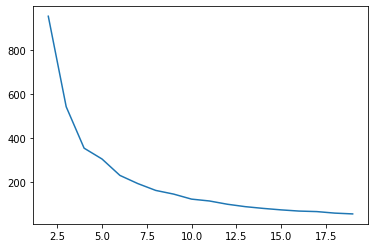

In [23]:
inertias = []
for k in range(2,20):
    kmns_ag = KMeans(n_clusters = k)
    kmns_ag.fit(data_against)
    inertias.append(kmns_ag.inertia_)
plt.plot(list(range(2,20)),inertias)

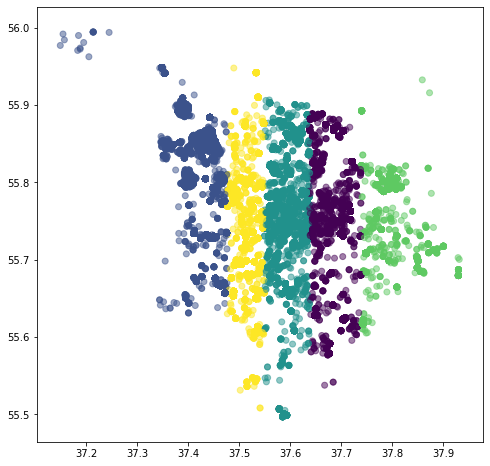

In [9]:
kmns_ag = KMeans(n_clusters = 5, n_jobs=-1)
output_ag = kmns_ag.fit_predict(data_against.iloc[:,:-1])
plt.figure(figsize=(8, 8))
plt.scatter(data_against.x, data_against.y, c = output_ag, alpha = 0.5)

## Подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)

In [25]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

Так как данных очень много я решил брать первые 15 000 - иначе оценка силуэта выполняется слишком долго

In [26]:
kmns_ag = KMeans(n_clusters = 4, n_jobs=-1)
output_ag = kmns_ag.fit_predict(data_against.iloc[:,:-1])

In [27]:
print("SIL: ", silhouette_score(data_against[:15000], output_ag[:15000]))

SIL:  0.5129190695950286


In [28]:
kmns_ag = KMeans(n_clusters = 5, n_jobs=-1)
output_ag = kmns_ag.fit_predict(data_against.iloc[:,:-1])
print("SIL: ", silhouette_score(data_against[:15000], output_ag[:15000]))

SIL:  0.4278246136755058


In [29]:
kmns_ag = KMeans(n_clusters = 6, n_jobs=-1)
output_ag = kmns_ag.fit_predict(data_against.iloc[:,:-1])
print("SIL: ", silhouette_score(data_against[:15000], output_ag[:15000]))

SIL:  0.4249075971380707


In [30]:
kmns_ag = KMeans(n_clusters = 3, n_jobs=-1)
output_ag = kmns_ag.fit_predict(data_against.iloc[:,:-1])
print("SIL: ", silhouette_score(data_against[:15000], output_ag[:15000]))

SIL:  0.604921228376548


## 3 кластера дают лучший результат

In [31]:
kmns = KMeans(n_clusters = 3, n_jobs=-1)
output = kmns.fit_predict(data_for.iloc[:,:-1])
print("SIL_for: ", silhouette_score(data_for[:15000], output[:15000]))

SIL_for:  0.604921228376548


In [32]:
kmns = KMeans(n_clusters = 4, n_jobs=-1)
output = kmns.fit_predict(data_for.iloc[:,:-1])
print("SIL_for: ", silhouette_score(data_for[:15000], output[:15000]))

SIL_for:  0.5129190695950286


In [33]:
kmns = KMeans(n_clusters = 2, n_jobs=-1)
output = kmns.fit_predict(data_for.iloc[:,:-1])
print("SIL_for: ", silhouette_score(data_for[:15000], output[:15000]))

SIL_for:  0.3986644515684385


## 3 кластера дают лучший результат

## Найти наиболее активные в голосовании районы (подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')

In [11]:
from sklearn.cluster import DBSCAN

In [ ]:
# db = DBSCAN(eps=0.07,min_samples=100)
# output2 = db.fit_predict(data.iloc[:,:-1])
# plt.figure(figsize=(7, 7))
# plt.scatter(data.x, data.y, c=output2 ,cmap='gray')
# plt.show()


db = DBSCAN(eps=0.07,min_samples=20, n_jobs=-1)
output2 = db.fit_predict(data_against.iloc[:,:-1])
plt.figure(figsize=(8, 8))
plt.scatter(data_against.x, data_against.y, c = output2, cmap='gray')

Я не понимаю почему у меня не получилось. У меня этот кусок кода выполняется очень долго и не видно основную выборку. Подскажите пожалуйста как это все-таки сделать